In [28]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import feature_engineering_functions
import pycaret
from pycaret.classification import *
from scipy.stats import pearsonr
from dataprep.eda import create_report
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [29]:
df = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,spo2_tracking,ECG_tracking
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.792100,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,10.907065,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,Underweight,2021-05-24T00:40:00.000,2021-05-24T09:21:00.000,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1,621e328667b776a240281372,2021-05-24,33.973120,62.388,35.216,95.9,14.6,76.0,0.766667,0.725,0.766667,-1.405808,2619.85,41.384470,6568.9,83.919698,132.0,7.0,30.0,1271.0,0.0,10.907065,66.100178,27240000.0,0.0,399.0,54.0,0.0,95.0,0.986206,0.963636,0.984866,0.987500,8550.0,278.0,766.0,29.0,1.0,1.0,0.0,Obese,NaN,NaN,Maintenance,intrinsic_regulation,NaN,HIGH,AVERAGE,HIGH,LOW,LOW,Below average,Below average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
2,621e326767b776a24012e179,2021-05-24,33.973120,46.120,53.968,95.3,14.4,80.0,0.666667,0.925,0.766667,-4.129593,2204.50,52.760580,11283.7,68.275766,278.0,41.0,67.0,616.0,0.0,10.907065,52.516339,27240000.0,0.0,399.0,54.0,0.0,95.0,0.986206,0.963636,0.984866,0.987500,16992.0,131.0,1225.0,0.0,0.0,0.0,1.0,Underweight,NaN,NaN,Maintenance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Below average,Below average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
3,621e332267b776a24092a584,2021-05-24,33.973120,62.388,35.216,95.9,14.6,76.0,0.766667,0.725,0.766667,-1.405808,3792.13,53.531830,16776.8,78.842893,190.0,79.0,108.0,1063.0,0.0,10.907065,60.977217,27240000.0,0.0,399.0,54.0,0.0,95.0,0.986206,0.963636,0.984866,0.987500,21284.0,175.0,1130.0,9.0,0.0,0.0,0.0,Normal,NaN,NaN,Maintenance,identified_regulation,NaN,LOW,LOW,LOW,AVERAGE,HIGH,Below average,Below average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0
4,621e333567b776a240a0c217,2021-05-24,33.973120,62.388,35.216,95.9,14.6,76.0,0.766667,0.725,0.766667,-1.405808,2251.67,45.738965,5434.6,78.919551,183.0,9.0,5.0,781.0,0.0,10.907065,66.100178,27240000.0,0.0,399.0,54.0,0.0,95.0,0.986206,0.963636,0.984866,0.987500,7794.0,133.0,1129.0,0.0,0.0,0.0,0.0,Normal,NaN,NaN,Contemplation,intrinsic_regulation,NaN

# Replace steps < 500 with user's median

In [30]:
df = df.astype({"id": str})
ids = list(np.unique((df[['id']])))
len(ids)

71

In [31]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df.loc[user_df['steps'] < 500, 'steps'] = user_df['steps'].median()
    d = pd.concat([d, user_df])
    
d = d.reset_index()

In [32]:
#create_report(d).show_browser()

In [33]:
df = d.drop(columns='index')
df.head()

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,spo2_tracking,ECG_tracking
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,10.907065,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,Underweight,2021-05-24T00:40:00.000,2021-05-24T09:21:00.000,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.000000,0.309017,-0.988468,0.5,1.000000,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,1.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,0.309017,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
2,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,0.309017,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
3,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,35.216,95.9,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,0.0,10.907065,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,Underweight,2021-05-25T23:46:30.000,2021-05-26T09:06:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
4,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,35.216,95.9,14.8,82.0,0.933333,0.725,0.833333,-2.124199,2325.10,62.47493,6653.1,71.725477,133.0,21.0,37.0,622.0,0

In [34]:
#create_report(df).show_browser()

# Adds stress_quantile

In [35]:
df["stress_quantile"] = pd.qcut(df["stress_score"].rank(method='first'), [0, .25, .75, 1], labels=["low", "medium", "high"])

In [36]:
df['stress_quantile'].replace(to_replace=['low', 'medium', 'high'], value=[0, 1, 2], inplace=True)

<AxesSubplot: xlabel='count', ylabel='stress_quantile'>

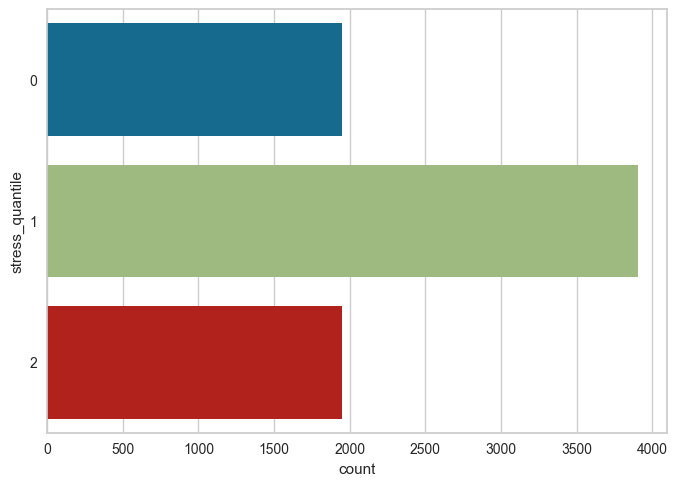

In [37]:
sns.countplot(y="stress_quantile", data=df)

In [38]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df["user_stress_quantile"] = pd.qcut(user_df["stress_score"].rank(method='first'), [0, .25, .75, 1], labels=[0, 1, 2])
    d = pd.concat([d, user_df])
    
df=d
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,spo2_tracking,ECG_tracking,stress_quantile,user_stress_quantile
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,10.907065,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,Underweight,2021-05-24T00:40:00.000,2021-05-24T09:21:00.000,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,2,1
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,1.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,2,1
2,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,2021-05-24T23:48:30.000,2021-05-25T08:56:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,2,1
3,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,35.216,95.9,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,62.57307,6090.9,71.842573,112.0,27.0,31.0,710.0,0.0,10.907065,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,Underweight,2021-05-25T23:46:30.000,2021-05-26T09:06:30.000,Maintenance,intrinsic_regulation,0.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.974928,3.090170e-01,-0.848644,0.5,-0.222521,0.951057,0.528964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,2,2
4,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,35.216,95.9,14.8,82.0,0.933333,0.725,0.83333

<AxesSubplot: xlabel='count', ylabel='user_stress_quantile'>

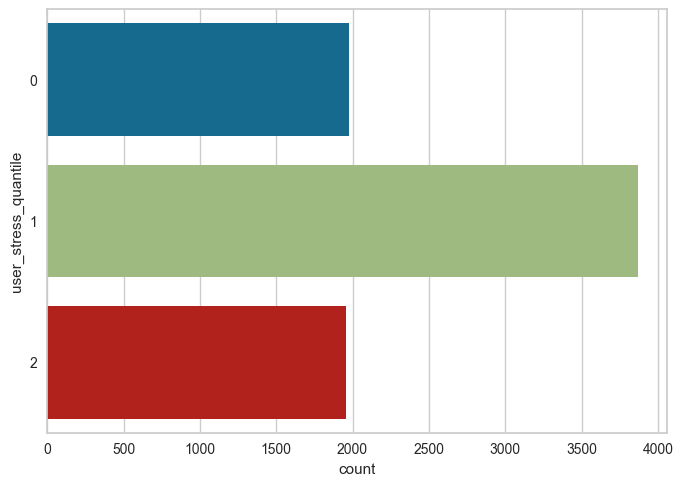

In [39]:
sns.countplot(y="user_stress_quantile", data=df)

In [40]:
#create_report(df).show_browser() # stress_quantile and user_stress quantile are NOT identical, keep them both

# Adds sleep duration average values for each user

In [41]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df['average_sleep_duration'] = user_df['sleep_duration'].mean()
    d = pd.concat([d, user_df])

In [42]:
df=d

# Adds steps average values for each user

In [43]:
d = pd.DataFrame()

for user in ids:
    user_df = df[(df["id"] == user)]
    user_df['average_steps'] = user_df['steps'].mean()
    d = pd.concat([d, user_df])

In [44]:
df=d

----------------
# tsfresh

In [45]:
df.columns

Index(['id', 'date', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'calories', 'filteredDemographicVO2Max',
       'distance', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'mindfulness_session', 'scl_avg', 'resting_hr', 'sleep_duration',
       'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'sleep_efficiency', 'sleep_deep_ratio',
       'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'startTime', 'endTime', 'label_ttm_stage',
       'label_breq_self_determination', 'label_sema_negative_feelings',
      

In [46]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters

In [47]:
settings = EfficientFCParameters()
del settings["friedrich_coefficients"]
del settings["max_langevin_fixed_point"]

In [48]:
cols = ['nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'calories',
       'distance', 'bpm', 'lightly_active_minutes',
       'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes',
       'mindfulness_session', 'resting_hr', 'sleep_duration',
       'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'sleep_efficiency', 'sleep_deep_ratio',
       'sleep_wake_ratio', 'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3']

for col in cols:
    extracted_features = extract_features(df, column_id="id", column_sort="date", 
                                          n_jobs=5, column_kind=None, column_value=col, 
                                          show_warnings=False, default_fc_parameters=settings)
    extracted_features = extracted_features.reset_index()
    extracted_features = extracted_features.rename(columns={"index": "id"})
    df = df.merge(extracted_features, how='left', on=['id'])

Feature Extraction: 100%|█████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.44it/s]


In [49]:
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,spo2_tracking,ECG_tracking,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps,nightly_temperature__variance_larger_than_standard_deviation,nightly_temperature__has_duplicate_max,nightly_temperature__has_duplicate_min,nightly_temperature__has_duplicate,nightly_temperature__sum_values,nightly_temperature__abs_energy,nightly_temperature__mean_abs_change,nightly_temperature__mean_change,nightly_temperature__mean_second_derivative_central,nightly_temperature__median,nightly_temperature__mean,nightly_temperature__length,nightly_temperature__standard_deviation,nightly_temperature__variation_coefficient,nightly_temperature__variance,nightly_temperature__skewness,nightly_temperature__kurtosis,nightly_temperature__root_mean_square,nightly_temperature__absolute_sum_of_changes,nightly_temperature__longest_strike_below_mean,nightly_temperature__longest_strike_above_mean,nightly_temperature__count_above_mean,nightly_temperature__count_below_mean,nightly_temperature__last_location_of_maximum,nightly_temperature__first_location_of_maximum,nightly_temperature__last_location_of_minimum,nightly_temperature__first_location_of_minimum,nightly_temperature__percentage_of_reoccurring_values_to_all_values,nightly_temperature__percentage_of_reoccurring_datapoints_to_all_datapoints,nightly_temperature__sum_of_reoccurring_values,nightly_temperature__sum_of_reoccurring_data_points,nightly_temperature__ratio_value_number_to_time_series_length,nightly_temperature__maximum,nightly_temperature__absolute_maximum,nightly_temperature__minimum,nightly_temperature__benford_correlation,nightly_temperature__time_reversal_asymmetry_statistic__lag_1,nightly_temperature__time_reversal_asymmetry_statistic__lag_2,nightly_temperature__time_reversal_asymmetry_statistic__lag_3,nightly_temperature__c3__lag_1,nightly_temperature__c3__lag_2,nightly_temperature__c3__lag_3,nightly_temperature__cid_ce__normalize_True,nightly_temperature__cid_ce__normalize_False,nightly_temperature__symmetry_looking__r_0.0,nightly_temperature__symmetry_looking__r_0.05,nightly_temperature__symmetry_looking__r_0.1,nightly_temperature__symmetry_looking__r_0.15000000000000002,nightly_temperature__symmetry_looking__r_0.2,nightly_temperature__symmetry_looking__r_0.25,nightly_temperature__symmetry_looking__r_0.30000000000000004,nightly_temperature__symmetry_looking__r_0.35000000000000003,nightly_temperature__symmetry_looking__r_0.4,nightly_temperature__symmetry_looking__r_0.45,nightly_temperature__symmetry_looking__r_0.5,nightly_temperature__symmetry_looking__r_0.55,nightly_temperature__symmetry_looking__r_0.6000000000000001,nightly_temperature__symmetry_looking__r_0.65,n

In [51]:
df.to_pickle("../data/unified_dataframe/data_features.pkl")